# Random Forest (Regression)
This document is applying the Random Forest model for regression on the `train` and `test` datasets. It attempts to predict the **time** when the next event will occur.

The model works by predicting the relative amount of seconds. This is the amount of seconds it is predicted to take from the startTime of the current event to the next event.

In [62]:
# Setup
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from random_forest import RandomForestRegressor


# Config variables
Initializing variables for configuration and tuning, defining the amount of samples to take from the dataset, the amount of trees in the forest, the datasets, etc.

In [63]:
# Config variables
training_data_path = '../datasets/bpi_2012_train_eng.csv'
testing_data_path = '../datasets/bpi_2012_test_eng.csv'

n_samples = 5000
n_trees = 10
sample_split = 5
max_depth = 5


# Loading the data

In [85]:
# Loading and splitting the datasets
df_train = pd.read_csv(training_data_path)
df_train = df_train.set_index('event_index').drop('Unnamed: 0', axis=1)

df_test = pd.read_csv(testing_data_path)
df_test = df_test.set_index('event_index').drop('Unnamed: 0', axis=1)


In [86]:
# Selecting columns and rows
df_train = df_train.drop(['nextEvent', 'nextEventTime'], axis=1)[0:n_samples]
df_test = df_test.drop(['nextEvent', 'nextEventTime'], axis=1)[0:n_samples]


In [87]:
df_train = df_train.dropna()
df_test = df_test.dropna()


In [88]:
# Starting time
start_time = time.time()

X_train = df_train.drop(['nextEventTimeRel'], axis=1).values
Y_train = df_train['nextEventTimeRel'].values.reshape(-1, 1)
X_test = df_test.drop(['nextEventTimeRel'], axis=1).values
Y_test = df_test['nextEventTimeRel'].values.reshape(-1, 1)

# Constructing and fitting the model
regressor = RandomForestRegressor(n_trees=n_trees, min_samples_split=sample_split, max_depth=max_depth)
regressor.fit(X_train, Y_train)

# Predicting the values of our test dataset
Y_pred = regressor.predict(X_test)
mse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Retrieving the accuracy of the model
print(f'MSE score: {mse}')

# Ending time
end_time = time.time()
print(f'\r\nThe execution of Random Forest took {round(end_time - start_time)} seconds')


# Analysis of model accuracy

In [106]:
#df_analysis = pd.DataFrame(pd.concat((Y_pred, Y_test), axis=1))
#df_analysis
#Y_test_s = pd.Series(Y_test)
#Y_test_s
df_analysis = pd.DataFrame(Y_test)
df_analysis = df_analysis.rename(columns={0: 'true'})
df_analysis['pred'] = Y_pred
df_analysis


# Pred value | True value
#df_analysis['error_percentage'] = round(((df_analysis[''])))

#r_train_analysis['error_percentage'] = round(((r_train_analysis['prediction_time_trace_end'] - r_train_analysis['time_trace_end']) / r_train_analysis['time_trace_end'] * 100).astype(int))
#r_train_analysis.head(10)


,true,pred
0,160391.0,78522.824013
1,1815.0,78522.824013
2,952186.0,78522.824013
3,13549.0,78522.824013
4,252437.0,78522.824013
...,...,...
3986,0.0,78522.824013
3987,1.0,78522.824013
3988,1495.0,78522.824013
3989,887409.0,78522.824013


# Post-modelling EDA

So, the model's predictions seem to be horribly wrong. What does our data actually look like? Why is it so far off?

<AxesSubplot:xlabel='startTimeRel', ylabel='nextEventTimeRel'>

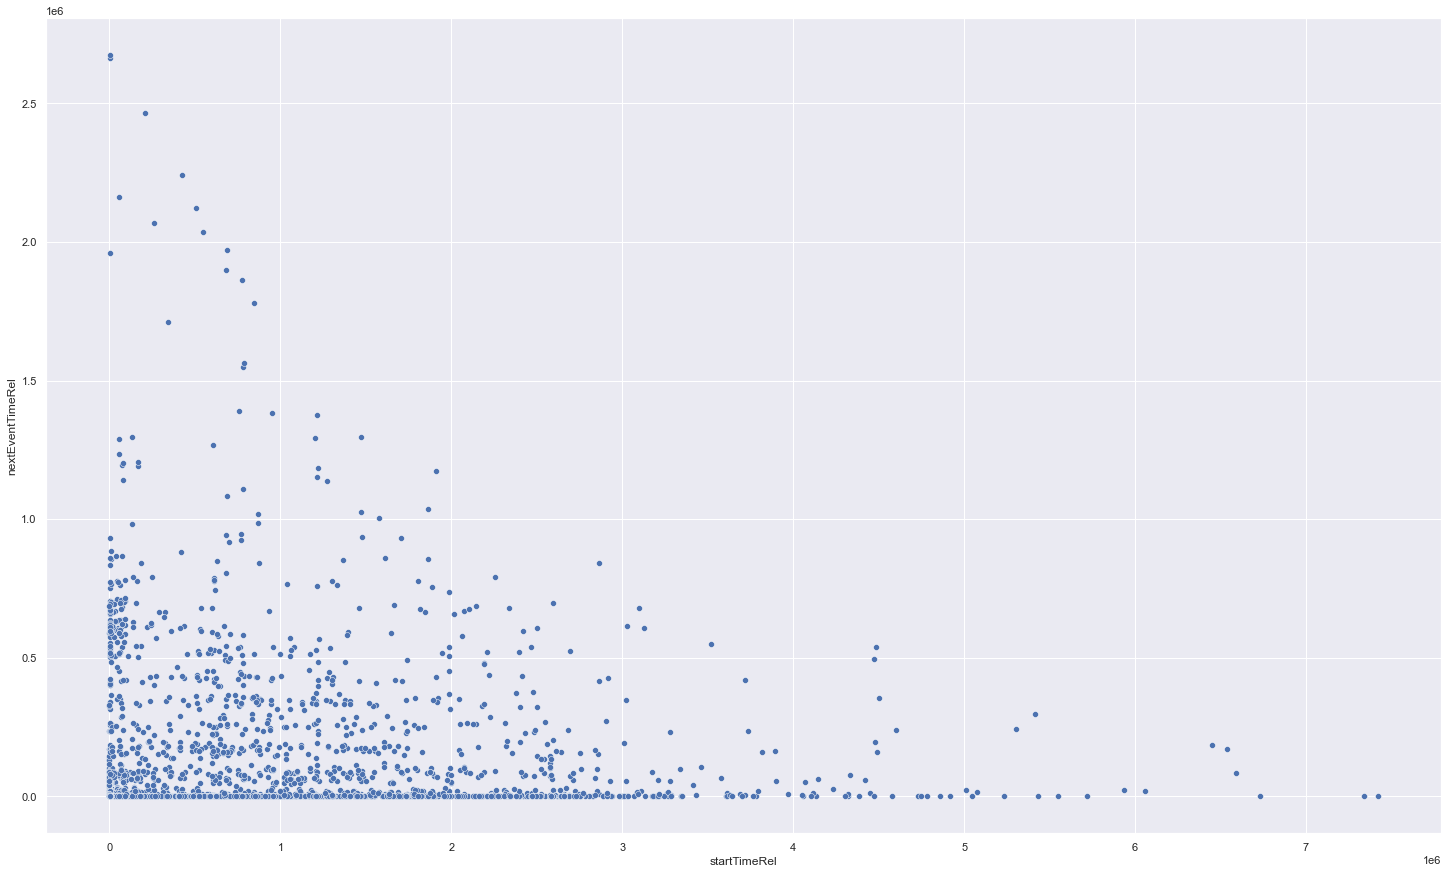

In [68]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(25,15)})
sns.scatterplot(data=df_train, x='startTimeRel', y='nextEventTimeRel')


# Applying libraries

Applying the SKLearn library to hopefully circumvent the issue of weird tree generation.

In [69]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib as plt

rfc = RandomForestRegressor(random_state=42)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

ValueError: could not convert string to float: 'O_SENT_BACK'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, rfc_pred)

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
